<a href="https://colab.research.google.com/github/WafaaMSawan/AI/blob/main/CLIP_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install transformers


In [ ]:
from PIL import Image
import os
from transformers import CLIPProcessor, CLIPModel
import pandas as pd
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


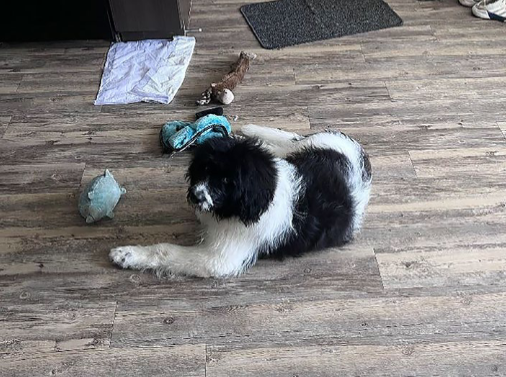

In [ ]:
os.chdir("/content/drive/My Drive/Colab Notebooks")
image_path = '/content/drive/MyDrive/Colab Notebooks/benali_image.png'
Image.open(image_path)

In [ ]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [ ]:
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
image = Image.open(image_path)
inputs = processor(text=["a photo of a cat", "a photo of a dog with black and white fur", "a photo of a boy", "baseball field with a lot of peoplecheering"], images=image, return_tensors="pt", padding=True)

In [ ]:
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

In [ ]:
probs_percentage = probs.detach().numpy() * 100
text_inputs = ["a photo of a cat", "a photo of a dog with black and white fur", "a photo of a boy", "baseball field with a lot of people cheering"]

In [ ]:
df = pd.DataFrame({'text_input': text_inputs,'similarity_with_image (%)': probs_percentage[0]})
print(df)

                                     text_input  similarity_with_image (%)
0                              a photo of a cat                   5.397011
1     a photo of a dog with black and white fur                  55.885387
2                              a photo of a boy                  38.716583
3  baseball field with a lot of people cheering                   0.001016
